In [42]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
news=pd.read_csv("Main_News.csv")
# Economy data frames
fe=pd.read_csv("economy_facebook.csv")
ge=pd.read_csv("economy_googleplus.csv")
le=pd.read_csv("economy_linkedin.csv")

# Obama dataframes
fo=pd.read_csv("obama_facebook.csv")
go=pd.read_csv("obama_googleplus.csv")
lo=pd.read_csv("obama_linkedin.csv")

# Microsoft
fm =pd.read_csv("microsoft_facebook.csv")
gm=pd.read_csv("microsoft_googleplus.csv")
lm =pd.read_csv("microsoft_linkedin.csv")

# Palestine
fp =pd.read_csv("palestine_facebook.csv")
gp =pd.read_csv("palestine_googleplus.csv")
lp =pd.read_csv("palestine_linkedin.csv")



In [44]:
raw_news=news.copy()

In [45]:
# Shapes
print("News.csv=",news.shape)
print("Economy_Review_shape")
print("Facebook_Economy",fe.shape)
print("GooglePlus_Economy",ge.shape)
print("LinkedIn _Economy",le.shape)
print("Obama_Review_shape")
print("Facebook_Obama",fo.shape)
print("GooglePlus_Obama",go.shape)
print("LinkedIn _Obama",lo.shape)
print("Microsoft_Review_shape")
print("Facebook_Microsoft",fm.shape)
print("GooglePlus_Microsoft",gm.shape)
print("LinkedIn _Microsoft",lm.shape)
print("Palestine_Review_shape")
print("Facebook_Palestine",fp.shape)
print("GooglePlus_Palestine",gp.shape)
print("LinkedIn _Palestine",lp.shape)


News.csv= (93239, 11)
Economy_Review_shape
Facebook_Economy (33928, 145)
GooglePlus_Economy (33928, 145)
LinkedIn _Economy (33928, 145)
Obama_Review_shape
Facebook_Obama (28610, 145)
GooglePlus_Obama (28610, 145)
LinkedIn _Obama (28610, 145)
Microsoft_Review_shape
Facebook_Microsoft (21858, 145)
GooglePlus_Microsoft (21858, 145)
LinkedIn _Microsoft (21858, 145)
Palestine_Review_shape
Facebook_Palestine (8843, 145)
GooglePlus_Palestine (8843, 145)
LinkedIn _Palestine (28610, 145)


In [46]:
news.dtypes

IDLink                 int64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook             float64
GooglePlus           float64
LinkedIn             float64
dtype: object

In [47]:
news.isna().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

# Data Cleaning

### Steps taken to clean the data:

1. Replacing nan values in Categorical columns of News.csv dataframe with "unknown".
2. Convert dtypes of columns into their correct dtypes.
3. Remove any punctuations, url, emojis or uneccessary words from headline,title.

1. We notice there are many Nan values in "Source" column of news.csv.

In [48]:
news.loc[news["Source"].isna()].head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
6,80690,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,1767.216667,1982.847222,681.888889
56,81052,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0.000000,0.048546,1879.622222,2348.638889,953.680556
111,80994,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,-0.243068,0.048546,1879.800000,2398.013889,753.729167
350,62254,Human rights situation in Palestinian territor...,In a special meeting convened by the UN Human ...,NaN,palestine,2015-10-28 17:24:00,-0.228299,-0.124931,2296.916667,2971.493056,1001.215278
409,62258,Japan Contributes $5.73M To UNRWA’s Food Assis...,"JERUSALEM, October 31, 2015 (WAFA) – The Japan...",NaN,palestine,2015-10-31 04:30:00,0.166667,-0.042878,2661.927778,3556.548611,1006.125000


In [49]:
# Looks like Headline has the Nan values when Source is Deutsche Welle
print("Data with missing entry in Headline")
news.loc[news["Headline"].isna()].head()

Data with missing entry in Headline


,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
8754,64744,Obama suggests Russia might eventually work wi...,NaN,Deutsche Welle,obama,2015-12-01 07:54:00,-0.057885,0.0,1953.326389,1401.870833,519.966667
21082,70082,Vatican's recognition of Palestinian state bec...,NaN,Deutsche Welle,palestine,2016-01-03 07:40:00,-0.047246,0.0,1447.755556,1888.083333,599.006944
29525,73806,Obama promises Merkel 'substantial' help on re...,NaN,Deutsche Welle,obama,2016-01-21 18:12:00,0.117851,0.0,1414.409722,906.441667,307.154167
34784,21954,Ukraine's economy minister quits over reform o...,NaN,Deutsche Welle,economy,2016-02-03 07:16:00,0.002362,0.0,823.279167,1647.783333,689.951389
41804,79246,John Kerry and Mahmoud Abbas meet to discuss I...,NaN,Deutsche Welle,palestine,2016-02-21 14:57:00,-0.037689,0.0,1232.422222,1468.798611,468.125000


Checking for Distinct Sources incase there are few major sources we can fill Nan values based on a guess.

In [50]:

print("Number of Sources =",len(news["Source"].unique()))
# Count the occurrences of each unique category in the 'Source' column
source_counts = news['Source'].value_counts()

# Number of Sources with occurences greater than 100
pop_source=len(source_counts[source_counts>100])
print("Sources with occurences more than 100 times=",pop_source)

# Number of Sources with occurences greater than 250
pop_source=len(source_counts[source_counts>250])
print("Sources with occurences more than 250 times=",pop_source)

# Number of Sources with occurences greater than 500
pop_source=len(source_counts[source_counts>500])
print("Sources with occurences more than 500 times=",pop_source)

# Number of Sources with occurences greater than 800
pop_source=len(source_counts[source_counts>800])
print("Sources with occurences more than 800 times=",pop_source)

# Top Sources 

print("\n Top Sources with most articles refering as Source :")
source_counts[source_counts>800]


Number of Sources = 5757
Sources with occurences more than 100 times= 186
Sources with occurences more than 250 times= 63
Sources with occurences more than 500 times= 24
Sources with occurences more than 800 times= 6

 Top Sources with most articles refering as Source :


Source
Bloomberg           1732
Reuters             1321
ABC News            1098
New York Times       992
The Guardian         933
Business Insider     884
Name: count, dtype: int64

In [51]:
# Function to print Nan as Source grouped by Topic
def nan_with_topic(df,topic):
    for i in topic:
        print("Number of Occurences of Nan as Source= ",len(df.loc[(df["Topic"]==i)&(df["Source"].isna())]), "with Topic=",i)

nan_with_topic(news,["economy","obama","palestine","microsoft"])

Number of Occurences of Nan as Source=  34 with Topic= economy
Number of Occurences of Nan as Source=  6 with Topic= obama
Number of Occurences of Nan as Source=  233 with Topic= palestine
Number of Occurences of Nan as Source=  6 with Topic= microsoft


We notice that Nan values cannot be replaced in Source column because we some 6k distinct sources so guessing wouldnt be accurate. 
Replacing Nan value in Headline could also be challenging.

After a deeper dive into the data I have decided not to drop the Nan values rather replace them with "unkown" so that we can stil use the entry and not lose any of the information. 

Additionally it could provide interesting analysis in the future.

In [52]:
# Let's replace nan values with unkown 
news[['Source', 'Headline']] = news[['Source', 'Headline']].fillna('unknown')

In [53]:
news.isna().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

Nan values are handled

2. Working with dtypes of news.csv and converting them into their correct form.

In [54]:
news.dtypes

IDLink                 int64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook             float64
GooglePlus           float64
LinkedIn             float64
dtype: object

In [55]:
# PublishDate has to be converted into datetime[ns] and IDLink has to be int64
def convert_datatypes(df):
    """
    Transform specific column dtypes in a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame to transform
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with transformed column types
    """
    # Create a copy to avoid modifying the original DataFrame
    transformed_df = df.copy()
    
    # Convert 'PublishDate' to datetime if the column exists
    if 'PublishDate' in transformed_df.columns:
        transformed_df['PublishDate'] = pd.to_datetime(transformed_df['PublishDate'], errors='coerce')
    
    # Convert 'IDLink' to integer
    transformed_df['IDLink'] = transformed_df['IDLink'].astype('int64')
    
    return transformed_df

In [56]:
# news
news=convert_datatypes(news)
# obama
fo=convert_datatypes(fo)
go=convert_datatypes(go)
lo=convert_datatypes(lo)

# economy
fe=convert_datatypes(fe)
ge=convert_datatypes(ge)
le=convert_datatypes(le)

# Microsoft
fm=convert_datatypes(fm)
gm=convert_datatypes(gm)
lm=convert_datatypes(lm)

# Palestine
fp=convert_datatypes(fp)
gp=convert_datatypes(gp)
lp=convert_datatypes(lp)

In [57]:
news.dtypes

IDLink                        int64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate          datetime64[ns]
SentimentTitle              float64
SentimentHeadline           float64
Facebook                    float64
GooglePlus                  float64
LinkedIn                    float64
dtype: object

3. I plan on removing any puctuations, links, extra spaces and punctuations so we can focus on the useful words in the string type columns.

In [58]:
def clean_dataframe_text(df):
    """
    Cleans all object-type columns in a DataFrame:
    - Removes emojis
    - Removes URLs
    - Removes punctuation
    - Removes extra whitespace
    - Strips leading and trailing whitespace

    Parameters:
    df (pd.DataFrame): Input DataFrame to clean.

    Returns:
    pd.DataFrame: Cleaned DataFrame.
    """
    def clean_text(text):
        if not isinstance(text, str):  # Ensure the value is a string
            return text
        # Remove emojis
        emoji_pattern = re.compile(
            "[" 
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE
        )
        text = emoji_pattern.sub(r'', text)
        # Remove URLs
        text = re.sub(r'http[s]?://\S+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        # Strip leading and trailing whitespace
        text = text.strip()
        return text

    # Apply cleaning to all object-type columns in the DataFrame
    df_cleaned = df.copy()  # Work on a copy to avoid modifying the original DataFrame
    for col in df_cleaned.select_dtypes(include=['object']).columns:
        df_cleaned[col] = df_cleaned[col].apply(clean_text)

    return df_cleaned

# Example usage
news = clean_dataframe_text(news)


In [59]:
news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,2547.659722,1538.570833,499.025000
1,10423,A Look at the Health of the Chinese Economy,Tim Haywood investment director businessunit h...,Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,1380.145833,1957.444444,753.729167
2,18828,Nouriel Roubini Global Economy Not Back to 2008,Nouriel Roubini NYU professor and chairman at ...,Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,1647.295833,2242.472222,874.993056
3,27788,Finland GDP Expands In Q4,Finlands economy expanded marginally in the th...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,1157.554167,1805.383333,701.736111
4,27789,Tourism govt spending buoys Thai economy in Ja...,Tourism and public spending continued to boost...,The Nation Thailand39s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,1439.512500,2166.450000,857.687500


# EDA

### Pie Chart for the distribution of each Topic {Economy,Obama,Palestine,Microsoft}

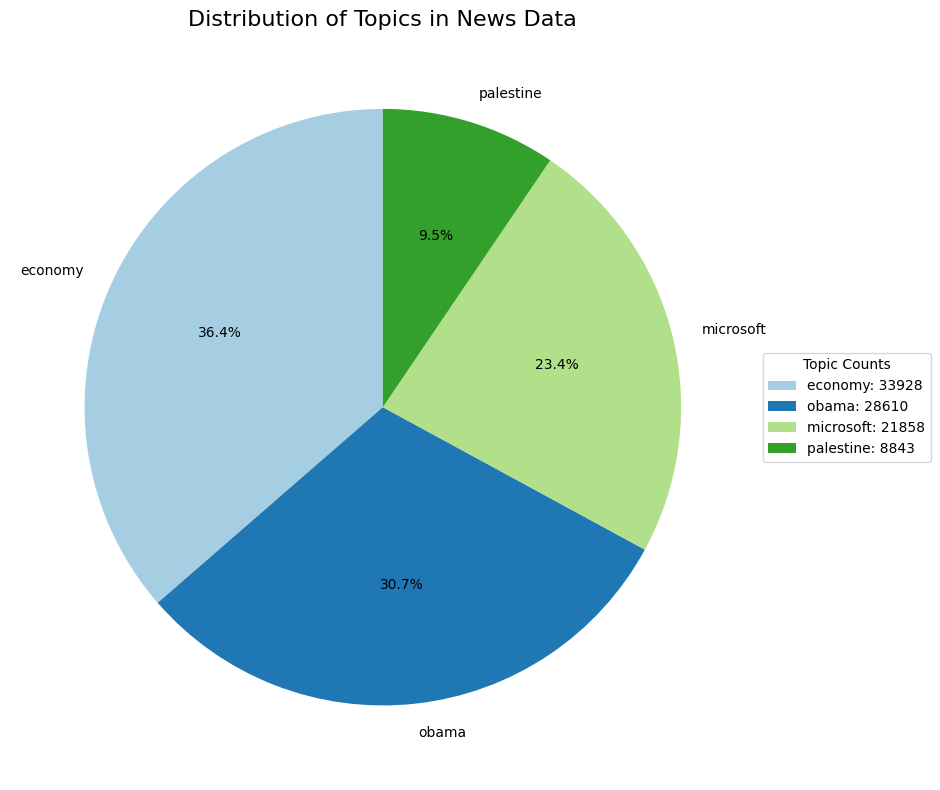

In [60]:
def plot_topic_distribution_pie_with_counts(news_df):
    """
    Plots a pie chart for the distribution of topics in the news dataframe,
    displaying the count of each topic and the total number of entries.

    Parameters:
    - news_df: DataFrame containing a 'Topic' column.

    Returns:
    - A pie chart showing the proportion and counts of each topic.
    """
    # Count the occurrences of each topic
    topic_counts = news_df['Topic'].value_counts()
    total_entries = topic_counts.sum()  # Total number of entries

    # Generate the pie chart
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(
        topic_counts, 
        labels=topic_counts.index,  # Topic names as labels
        autopct='%1.1f%%',  # Percentage display
        startangle=90,  # Start at the top
        colors=plt.cm.Paired.colors,  # Color palette
        textprops={'fontsize': 10}  # Font size for better readability
    )

    # Add topic counts and total entries to the legend
    legend_labels = [
        f"{topic}: {count}" for topic, count in zip(topic_counts.index, topic_counts.values)
    ]
    legend_labels.append(f"Total Entries: {total_entries}")
    plt.legend(wedges, legend_labels, title="Topic Counts", loc="center left", bbox_to_anchor=(1, 0.5))

    # Add title
    plt.title("Distribution of Topics in News Data", fontsize=16)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_topic_distribution_pie_with_counts(news)


It is important to note at this stage that we have different number of enteries for different topics therefore, for our future analysis we should use this information to standardize our insights. 

#### Movement of popularity for each platform

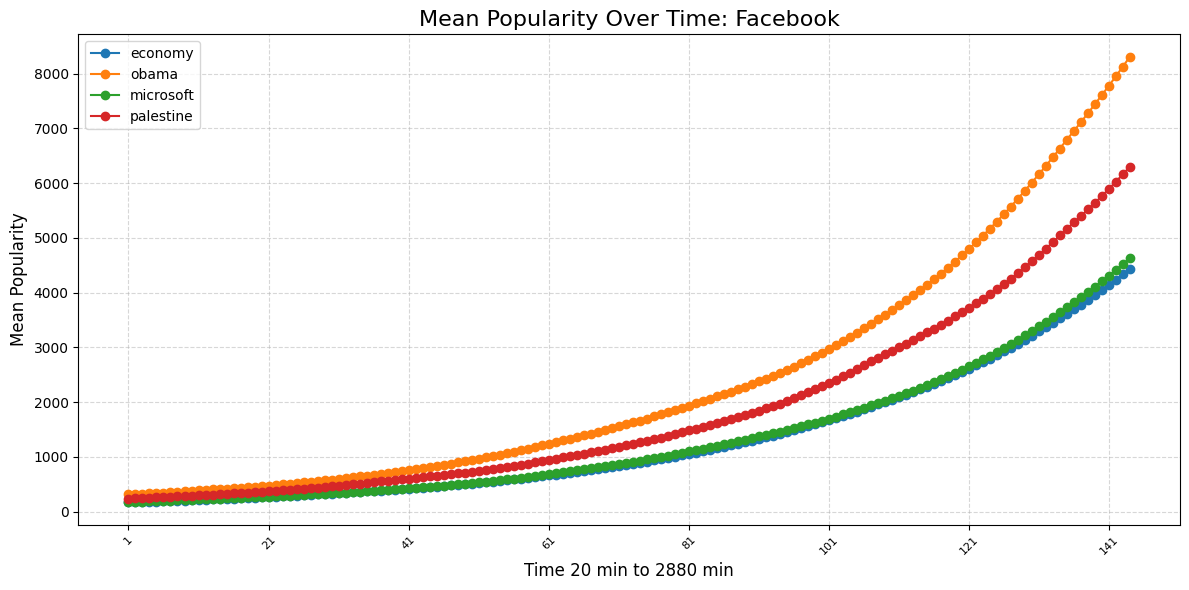

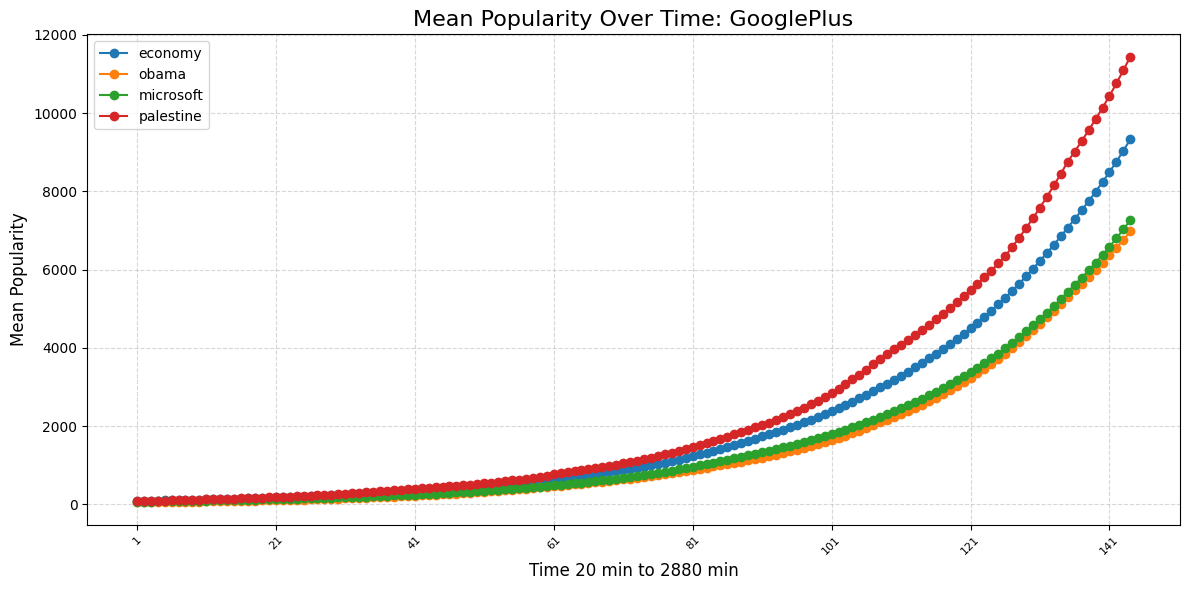

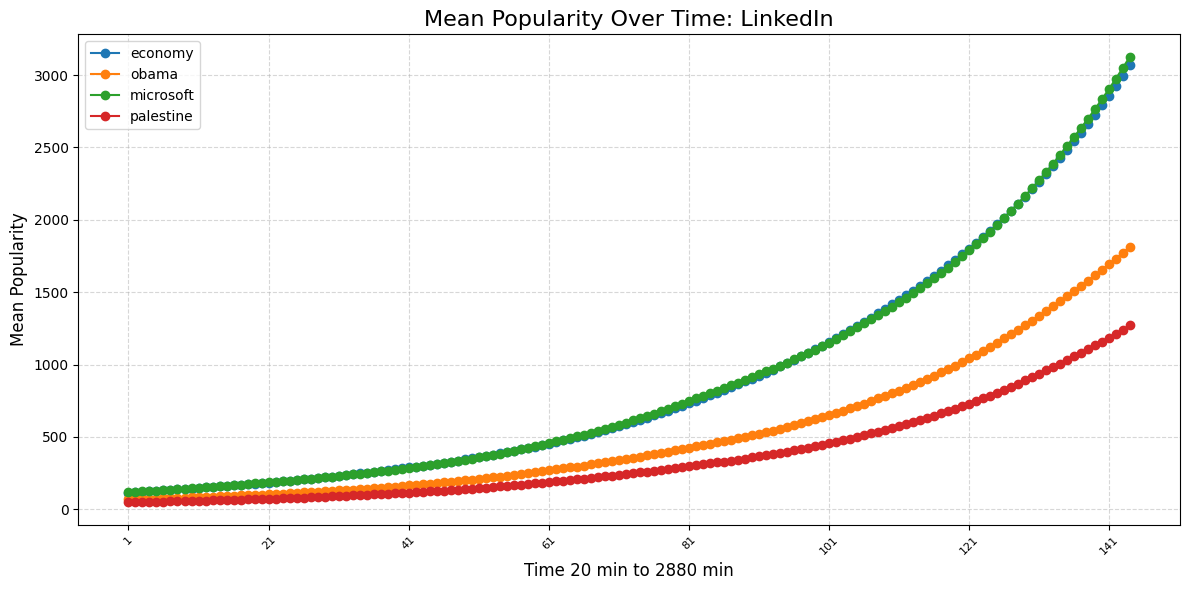

In [61]:
def plot_platform_wise(review_dfs, topics, platforms, title_prefix="Mean Popularity Over Time"):
    """
    Plots the mean of timestamp columns for each platform (Facebook, LinkedIn, GooglePlus) 
    across all topics in separate plots.

    Args:
        review_dfs (dict): A dictionary of review dataframes with keys as (topic, platform).
        topics (list): List of topics (e.g., ["Economy", "Obama", "Microsoft", "Palestine"]).
        platforms (list): List of platforms (e.g., ["Facebook", "GooglePlus", "LinkedIn"]).
        title_prefix (str): Prefix for each plot title (optional).
    """
    # For each platform (Facebook, LinkedIn, GooglePlus), create a plot
    for platform in platforms:
        plt.figure(figsize=(12, 6))

        # Iterate through topics to plot each topic's data for the current platform
        for topic in topics:
            df_key = (topic, platform)
            if df_key in review_dfs:
                review_df = review_dfs[df_key]

                # Identify timestamp columns (skip the "IDLink" and "Average" columns)
                timestamp_columns = [col for col in review_df.columns if "TS" in str(col)]

                # Calculate mean for each timestamp (time series)
                time_means = review_df[timestamp_columns].mean()

                # Plot with a label for the topic
                plt.plot(
                    range(1, len(time_means) + 1),  # X-axis as 1, 2, 3, ..., 144 (simplified)
                    time_means, 
                    label=f"{topic}",
                    linestyle="-", 
                    marker="o"
                )

        # Adding plot labels, title, and legend
        plt.title(f"{title_prefix}: {platform}", fontsize=16)
        plt.xlabel("Time 20 min to 2880 min", fontsize=12)
        plt.ylabel("Mean Popularity", fontsize=12)
        plt.xticks(
            range(1, len(time_means) + 1, 20),  # Every 20th point for better visibility
            rotation=45,
            fontsize=8
        )
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

# Example Usage
review_dfs = {
    ("economy", "Facebook"): fe,
    ("economy", "GooglePlus"): ge,
    ("economy", "LinkedIn"): le,
    ("obama", "Facebook"): fo,
    ("obama", "GooglePlus"): go,
    ("obama", "LinkedIn"): lo,
    ("microsoft", "Facebook"): fm,
    ("microsoft", "GooglePlus"): gm,
    ("microsoft", "LinkedIn"): lm,
    ("palestine", "Facebook"): fp,
    ("palestine", "GooglePlus"): gp,
    ("palestine", "LinkedIn"): lp,
}
topics = ["economy", "obama", "microsoft", "palestine"]
platforms = ["Facebook", "GooglePlus", "LinkedIn"]

# Plot platform-wise
plot_platform_wise(review_dfs, topics, platforms)


Insight - We see a general rise in popularity of throughout our review files for all topics across all platforms. This can be because an article floats in the web for longer resulting in more interactions with time, also a key note we have data for 2 days after publish date.

#### Number of articles published in a week day.

Number of Articles Published by Day of the Week:
DayOfWeek
Monday       16250
Tuesday      16720
Wednesday    15739
Thursday     15424
Friday       13846
Saturday      6994
Sunday        8266
Name: count, dtype: int64


C:\Users\ADHYATMA SHARMA\AppData\Local\Temp\ipykernel_18640\1021823054.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_counts.index, y=article_counts.values, palette='Blues_d')


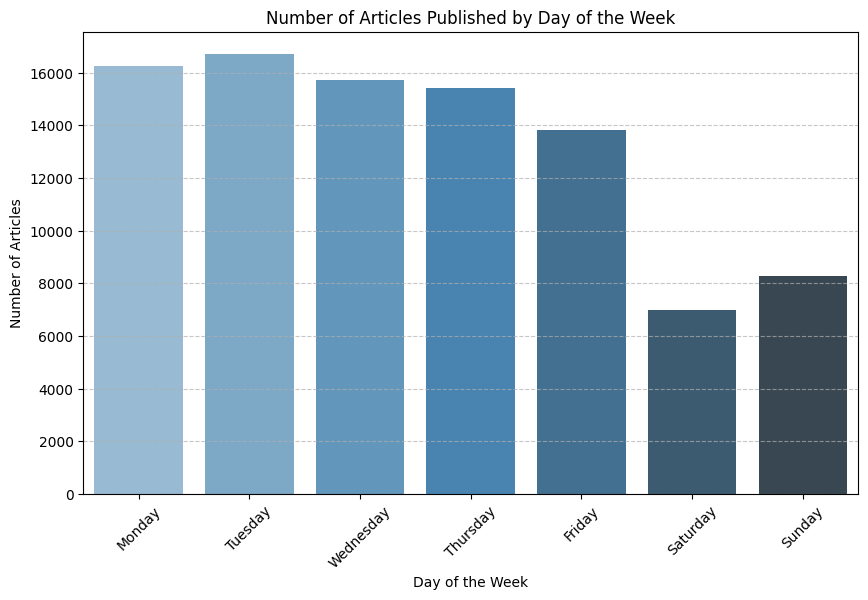

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_articles_by_day_of_week(news_df):
    """
    Counts and visualizes the number of articles published on each day of the week.

    Parameters:
    - news_df: DataFrame containing the PublishDate column
    
    Output:
    - Bar plot showing article counts by day of the week
    """
    
    # Extract day of the week from PublishDate
    df = news_df.copy()
    df['DayOfWeek'] = df['PublishDate'].dt.day_name()

    # Count articles by day of the week
    article_counts = df['DayOfWeek'].value_counts().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

    # Print article counts
    print("Number of Articles Published by Day of the Week:")
    print(article_counts)

    # Visualize using bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=article_counts.index, y=article_counts.values, palette='Blues_d')
    plt.title("Number of Articles Published by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
# Assuming news_df exists with a PublishDate column
plot_articles_by_day_of_week(news)


*Insight-Most of the articles in our dataframes were published during week days.*

#### Number of articles published in a time frame.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_articles_by_time_of_day(news_df):
    """
    Counts and visualizes the number of articles published during different times of the day.

    Parameters:
    - news_df: DataFrame containing the PublishDate column
    
    Output:
    - Bar plot showing article counts by time of day
    """

    # Extract hour from PublishDate
    df = news_df.copy()
    df['Hour'] = df['PublishDate'].dt.hour

    # Define time of day categories
    time_bins = [(6, 12, 'Morning (6 AM - 12 PM)'),
                 (12, 17, 'Afternoon (12 PM - 5 PM)'),
                 (17, 21, 'Evening (5 PM - 9 PM)'),
                 (21, 6, 'Night (9 PM - 6 AM)')]

    # Categorize articles into time of day
    def categorize_time(hour):
        for start, end, label in time_bins:
            if start <= hour < end or (start > end and (hour >= start or hour < end)):
                return label
        return 'Night (9 PM - 6 AM)'  # Default to night

    df['TimeOfDay'] = df['Hour'].apply(categorize_time)

    # Count articles by time of day
    article_counts = df['TimeOfDay'].value_counts().reindex(
        ['Morning (6 AM - 12 PM)', 'Afternoon (12 PM - 5 PM)', 
         'Evening (5 PM - 9 PM)', 'Night (9 PM - 6 AM)']
    )

    # Print article counts
    print("Number of Articles Published by Time of Day:")
    print(article_counts)

    # Visualize using bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=article_counts.index, y=article_counts.values, palette='cool')
    plt.title("Number of Articles Published by Time of Day")
    plt.xlabel("Time of Day")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Number of Articles Published by Time of Day:
TimeOfDay
Morning (6 AM - 12 PM)      20257
Afternoon (12 PM - 5 PM)    23551
Evening (5 PM - 9 PM)       17374
Night (9 PM - 6 AM)         32057
Name: count, dtype: int64


C:\Users\ADHYATMA SHARMA\AppData\Local\Temp\ipykernel_18640\4268153368.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_counts.index, y=article_counts.values, palette='cool')


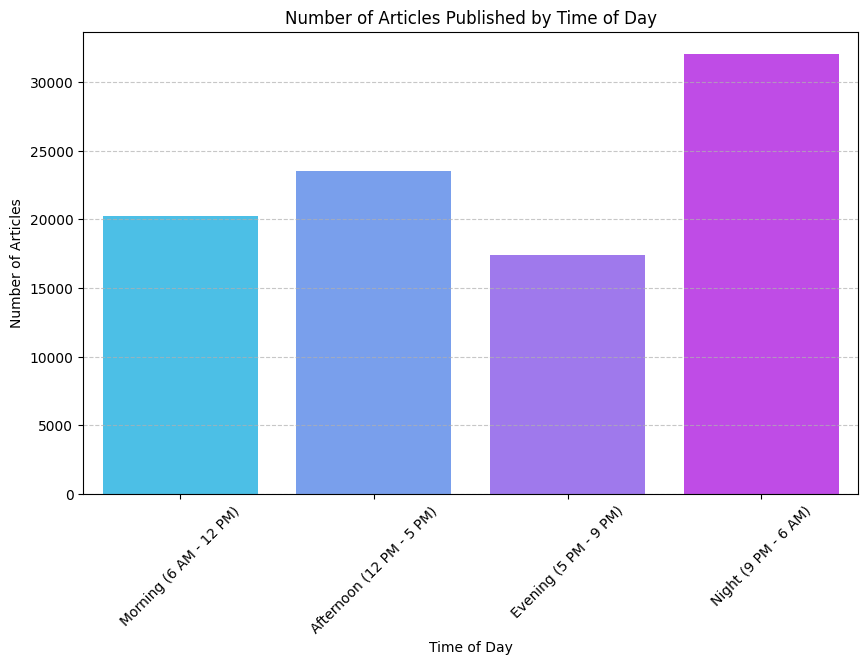

In [64]:
# Assuming news_df exists with a PublishDate column
plot_articles_by_time_of_day(news)

*Insight - Most of the articles were published either during night or morning hours.*

# *Business Questions Answered*

#### 1. Find the top topic for each platform.

Top Topics by Platform:
Facebook: obama (Average Popularity = 2411.93)
GooglePlus: palestine (Average Popularity = 2480.58)
LinkedIn: microsoft (Average Popularity = 909.74)


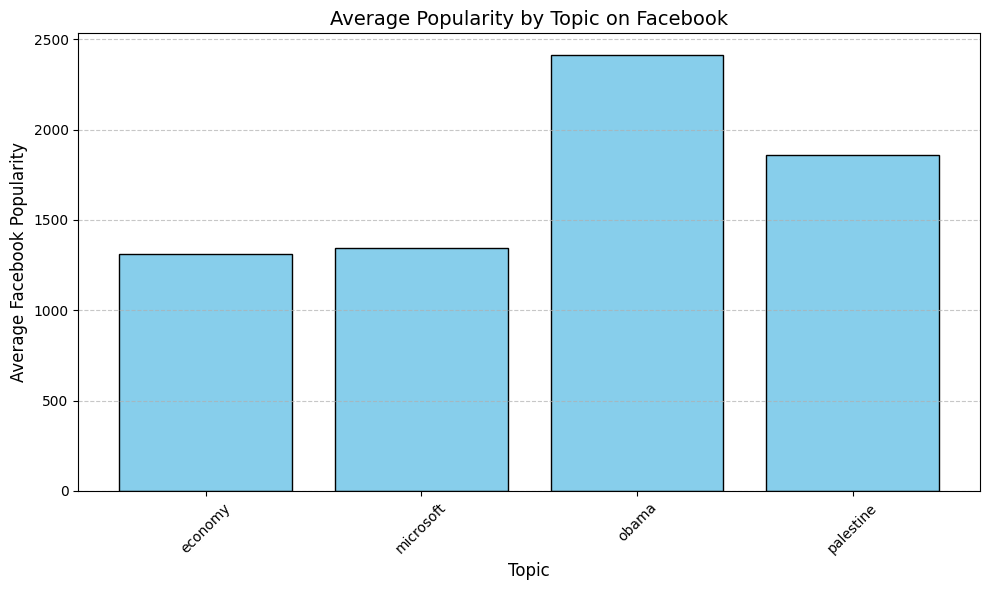

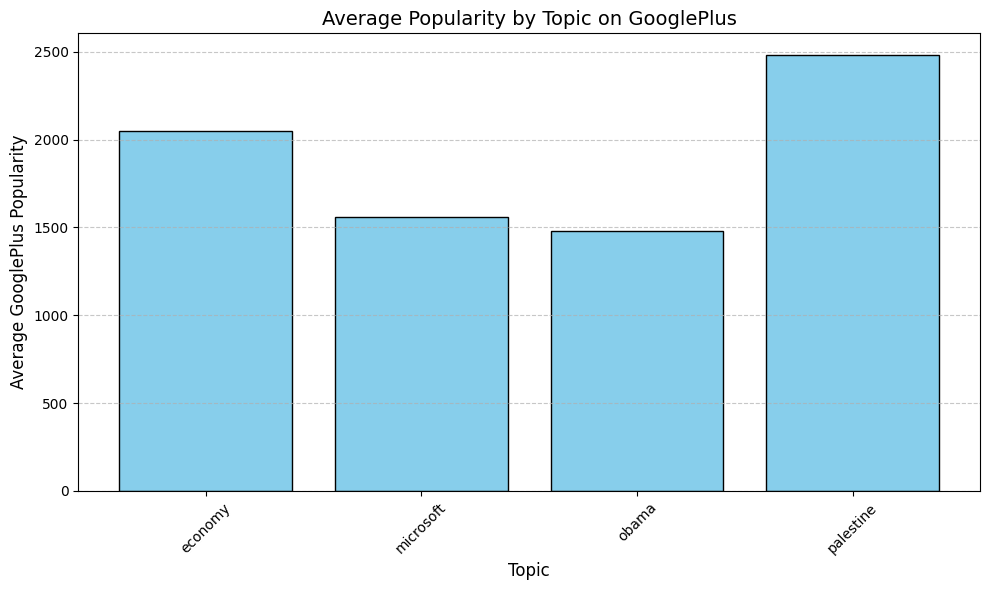

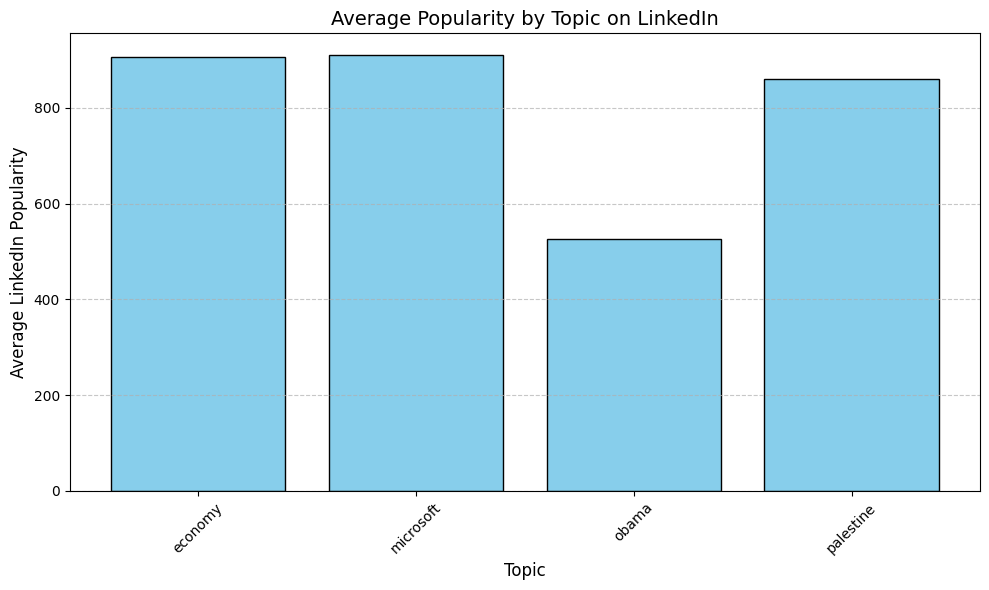

In [65]:
def top_topics_per_platform(news_df):
    """
    Identifies the top-performing topic on each platform.
    """
    platforms = ['Facebook', 'GooglePlus', 'LinkedIn']
    top_topics = {}

    for platform in platforms:
        # Find the topic with the highest average popularity
        top_topic = news_df.groupby('Topic')[platform].mean().idxmax()
        max_value = news_df.groupby('Topic')[platform].mean().max()
        top_topics[platform] = (top_topic, max_value)

    print("Top Topics by Platform:")
    for platform, (topic, value) in top_topics.items():
        print(f"{platform}: {topic} (Average Popularity = {value:.2f})")

# Call the function
top_topics_per_platform(news)

import matplotlib.pyplot as plt

def plot_platform_popularity(news_df):
    """
    Plots average popularity topic-wise for each platform: Facebook, GooglePlus, LinkedIn.
    """
    platforms = ['Facebook', 'GooglePlus', 'LinkedIn']
    
    for platform in platforms:
        # Group by Topic and calculate mean popularity for the platform
        topic_popularity = news_df.groupby('Topic')[platform].mean().reset_index()
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(topic_popularity['Topic'], topic_popularity[platform], color='skyblue', edgecolor='black')
        plt.title(f'Average Popularity by Topic on {platform}', fontsize=14)
        plt.xlabel('Topic', fontsize=12)
        plt.ylabel(f'Average {platform} Popularity', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Call the function
plot_platform_popularity(news)


Insights: 

* *Obama and Palestine perform better on facebook as compared to microsoft and economy, suggesting sentimental topics have a higher popularity on Facebook as compared to other topics.*

* *Global Topics like palestine and economy perform good on GooglePlus.*

* *Microsoft and Economy perform the best in LinkedIn as they directly relate to job opportunities and purpose of the platform.*

#### 2. Source vs Popularity

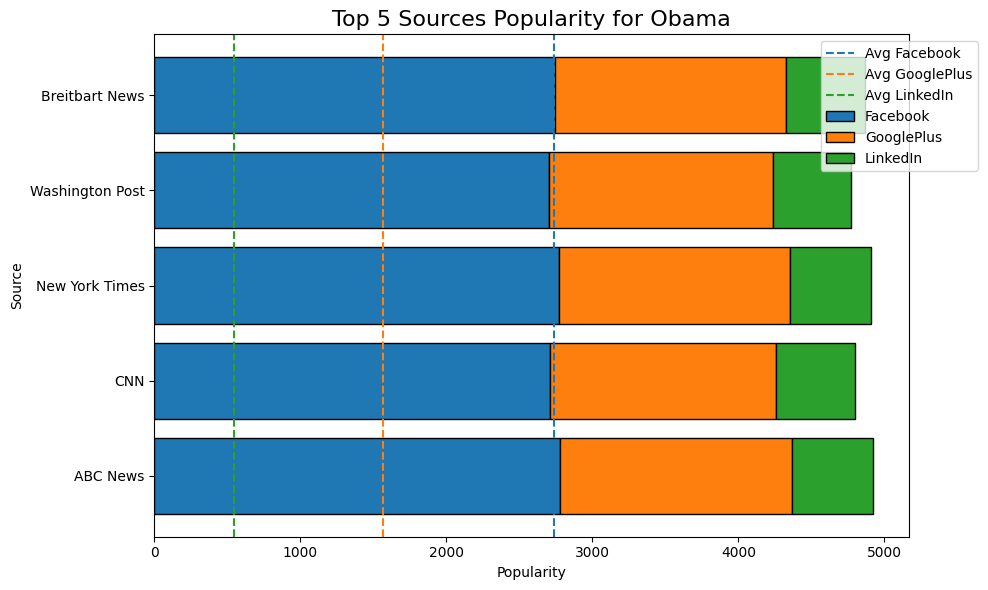

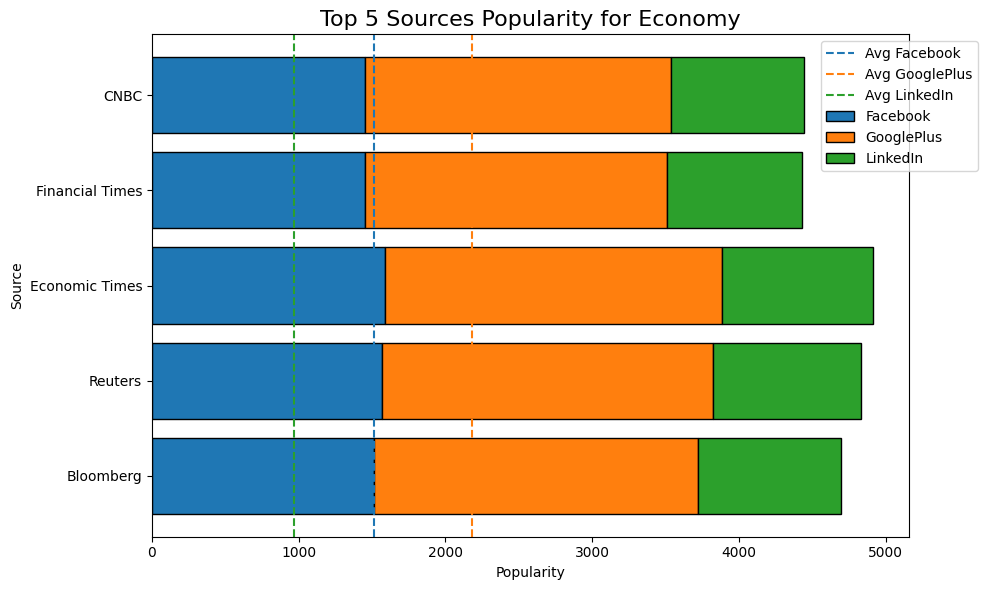

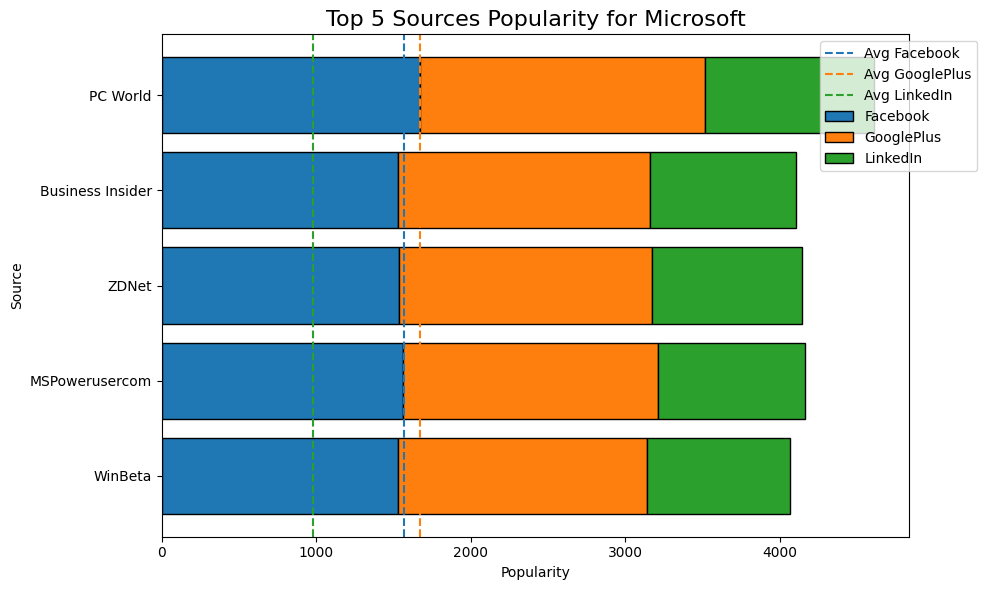

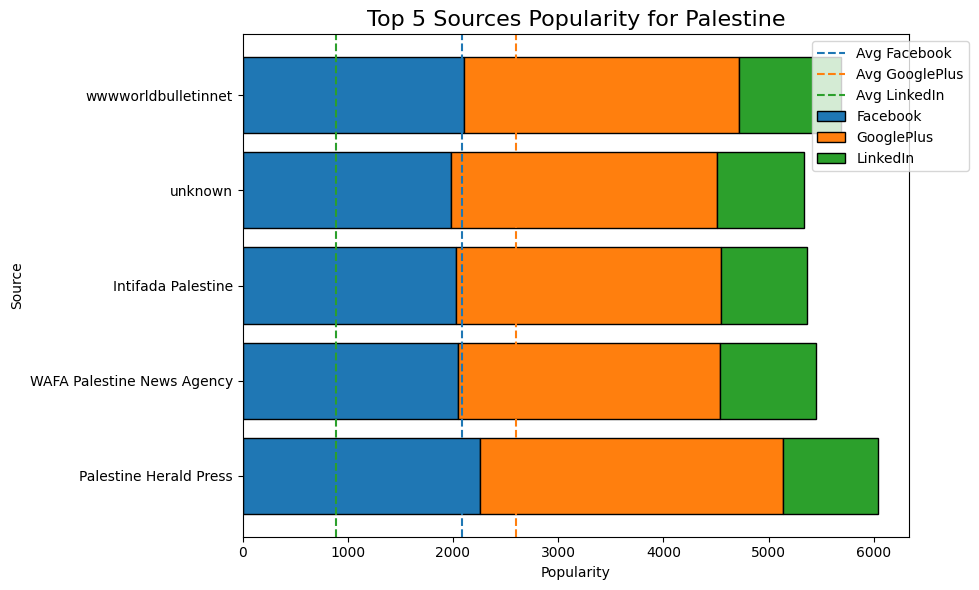

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate average popularity for each source
def calculate_source_popularity(news, top_sources, platforms):
    results = []
    for topic, sources in top_sources.items():
        for source, _ in sources:
            filtered_df = news[(news['Topic'] == topic) & (news['Source'] == source)]
            avg_popularity = filtered_df[platforms].mean().values
            results.append((topic, source, *avg_popularity))
    return pd.DataFrame(results, columns=['Topic', 'Source', *platforms])

# Function to plot the results for each topic
def plot_source_popularity(df, platforms):
    unique_topics = df['Topic'].unique()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Facebook, GooglePlus, LinkedIn

    for topic in unique_topics:
        topic_df = df[df['Topic'] == topic]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(f"Top 5 Sources Popularity for {topic.capitalize()}", fontsize=16)

        # Plot the popularity of each source
        for i, source in enumerate(topic_df['Source']):
            popularity = topic_df.iloc[i, 2:].values  # Get the platform popularity values
            ax.barh(i, popularity[0], color=colors[0], edgecolor='black', label='Facebook' if i == 0 else "")
            ax.barh(i, popularity[1], left=popularity[0], color=colors[1], edgecolor='black', label='GooglePlus' if i == 0 else "")
            ax.barh(i, popularity[2], left=popularity[0] + popularity[1], color=colors[2], edgecolor='black', label='LinkedIn' if i == 0 else "")

        # Add vertical lines for the average popularity of the topic in each platform
        avg_facebook = topic_df['Facebook'].mean()
        avg_googleplus = topic_df['GooglePlus'].mean()
        avg_linkedin = topic_df['LinkedIn'].mean()

        ax.axvline(avg_facebook, color=colors[0], linestyle='--', label='Avg Facebook')
        ax.axvline(avg_googleplus, color=colors[1], linestyle='--', label='Avg GooglePlus')
        ax.axvline(avg_linkedin, color=colors[2], linestyle='--', label='Avg LinkedIn')

        # Set labels
        ax.set_yticks(range(len(topic_df)))
        ax.set_yticklabels(topic_df['Source'])
        ax.set_xlabel('Popularity')
        ax.set_ylabel('Source')

        # Adjust legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

        # Adjust layout
        plt.tight_layout()
        plt.show()

# Function to analyze and plot the popularity of top sources
def analyze_popularity(news, platforms=['Facebook', 'GooglePlus', 'LinkedIn']):
    # Identify top 5 repeating sources for each topic
    top_sources = {topic: news[news['Topic'] == topic]['Source'].value_counts().head(5).items() 
                   for topic in news['Topic'].unique()}

    # Calculate popularity for the top sources
    source_popularity = calculate_source_popularity(news, top_sources, platforms)

    # Plot the results for each topic
    plot_source_popularity(source_popularity, platforms)

# Example usage
analyze_popularity(news)


Note - not all popularity are equally high or low in different platform, for example obama has a low popularity in linkedin however we can deduce from the first plot that articles with popular sources for obama are still popular on linkedin as compared to its average popularity in the platform.

*Insight: Almost all articles with popular sources for a topic attain a lot of traction as compared to the other average sources on all platforms irrespective of the topic. Therefore we can conclude Source is a highly important parameter for an articles popularity irrespective of the platfrom or topic. A repetative source for a topic will attain on an average higher popularity as compared to sources that are not frequent.*

#### 3. Sentiment vs popularity

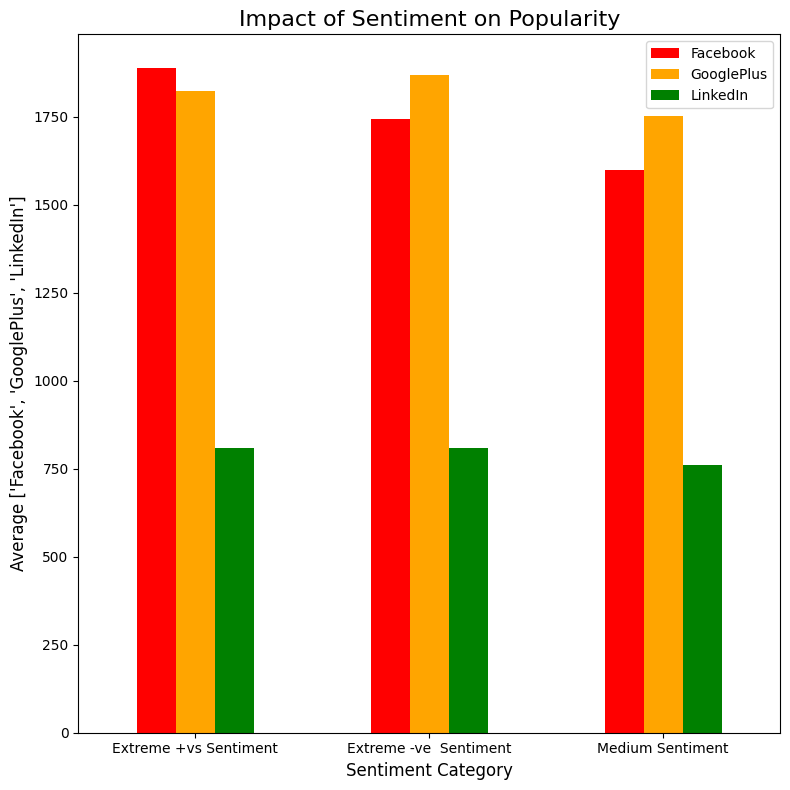

,Facebook,GooglePlus,LinkedIn
sentiment_category,,,
Extreme +vs Sentiment,1890.259258,1824.372085,808.876082
Extreme -ve Sentiment,1745.458791,1869.388414,810.139478
Medium Sentiment,1600.414076,1752.636002,762.046227


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_sentiment_impact(df, popularity_col, sentiment_cols):
    """
    Analyzes and visualizes the impact of sentiment on popularity.

    Parameters:
    - df: DataFrame containing sentiment and popularity data.
    - popularity_col: Column name representing popularity (e.g., TS data).
    - sentiment_cols: List of sentiment column names to average (e.g., ["SentimentHeadline", "SentimentTitle"]).

    Returns:
    - Visualization comparing popularity across sentiment categories.
    """
    # Step 1: Compute sentiment_mean
    df['sentiment_mean'] = df[sentiment_cols].mean(axis=1)

    # Step 2: Define quartile ranges
    q25, q75 = df['sentiment_mean'].quantile(0.25), df['sentiment_mean'].quantile(0.75)

    # Step 3: Categorize sentiment levels
    def categorize_sentiment(mean):
        if mean < q25:
            return 'Extreme -ve  Sentiment'
        elif mean <= q75:
            return 'Medium Sentiment'
        else:
            return 'Extreme +vs Sentiment'

    df['sentiment_category'] = df['sentiment_mean'].apply(categorize_sentiment)

    # Step 4: Aggregate popularity by sentiment category
    sentiment_popularity = df.groupby('sentiment_category')[popularity_col].mean()

    # Step 5: Visualize
    fig, ax = plt.subplots(figsize=(8, 8))
    sentiment_popularity.plot(kind='bar', color=['red', 'orange', 'green'], ax=ax)

    # Add labels and title
    ax.set_title('Impact of Sentiment on Popularity', fontsize=16)
    ax.set_xlabel('Sentiment Category', fontsize=12)
    ax.set_ylabel(f'Average {popularity_col}', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return df, sentiment_popularity


# Example usage:
# Assuming `df` has columns 'SentimentHeadline', 'SentimentTitle', and 'TS1' (popularity)
df, sentiment_popularity = analyze_sentiment_impact(news, popularity_col=['Facebook','GooglePlus','LinkedIn'], sentiment_cols=['SentimentHeadline', 'SentimentTitle'])
sentiment_popularity


*Insight - Articles with extreme positive or negative Headline/Title perform better on all platforms as compared to modest sentiment Headline/Title article. The articles follow "Bad publicity is Good publicity". Articles with extreme negative values perform even better than positive articles on googleplus and linkedin.*

### 4. Average popularity of articles having the most used words in Headline and Title column for each Topic.

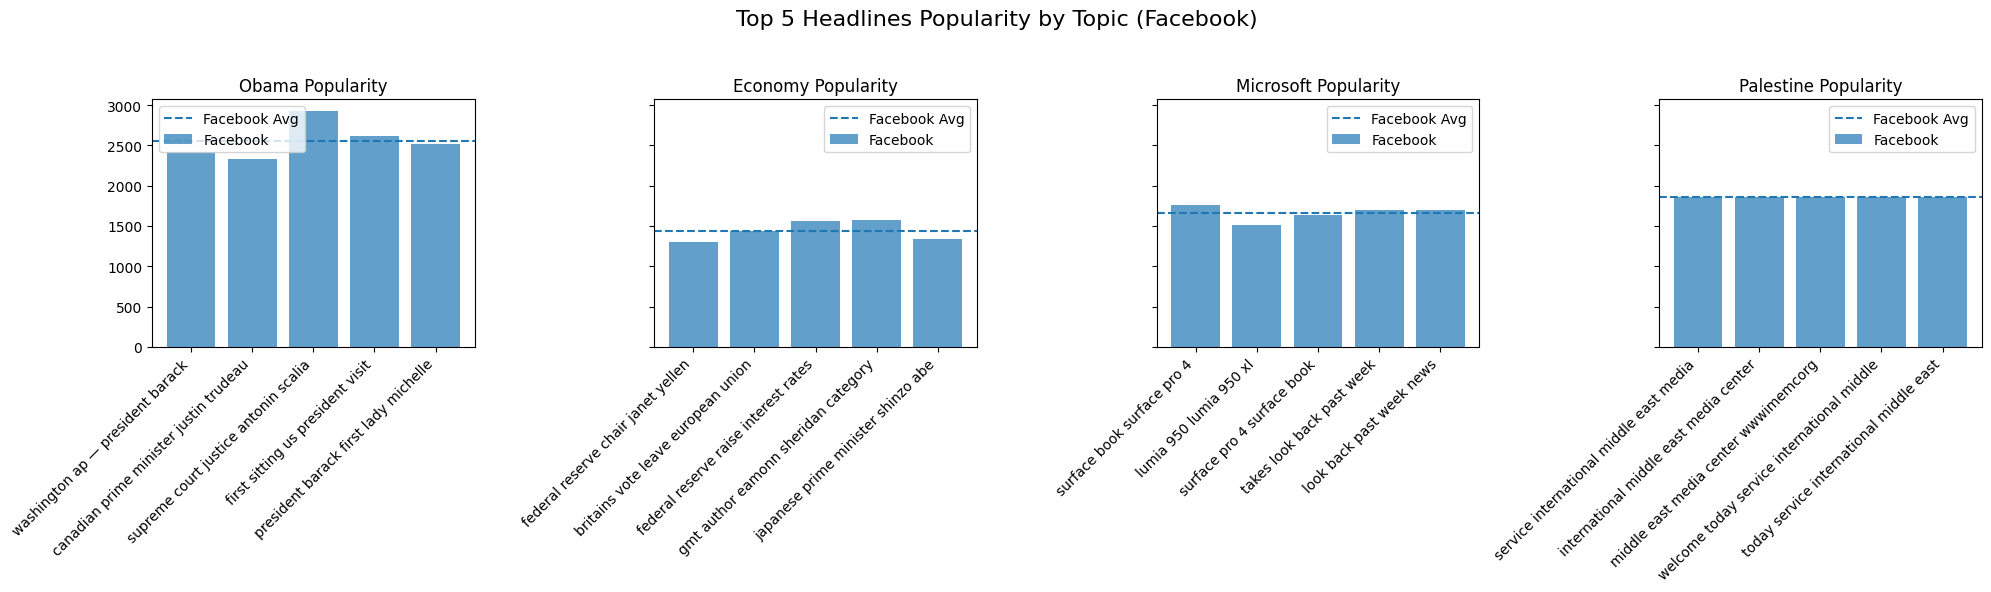

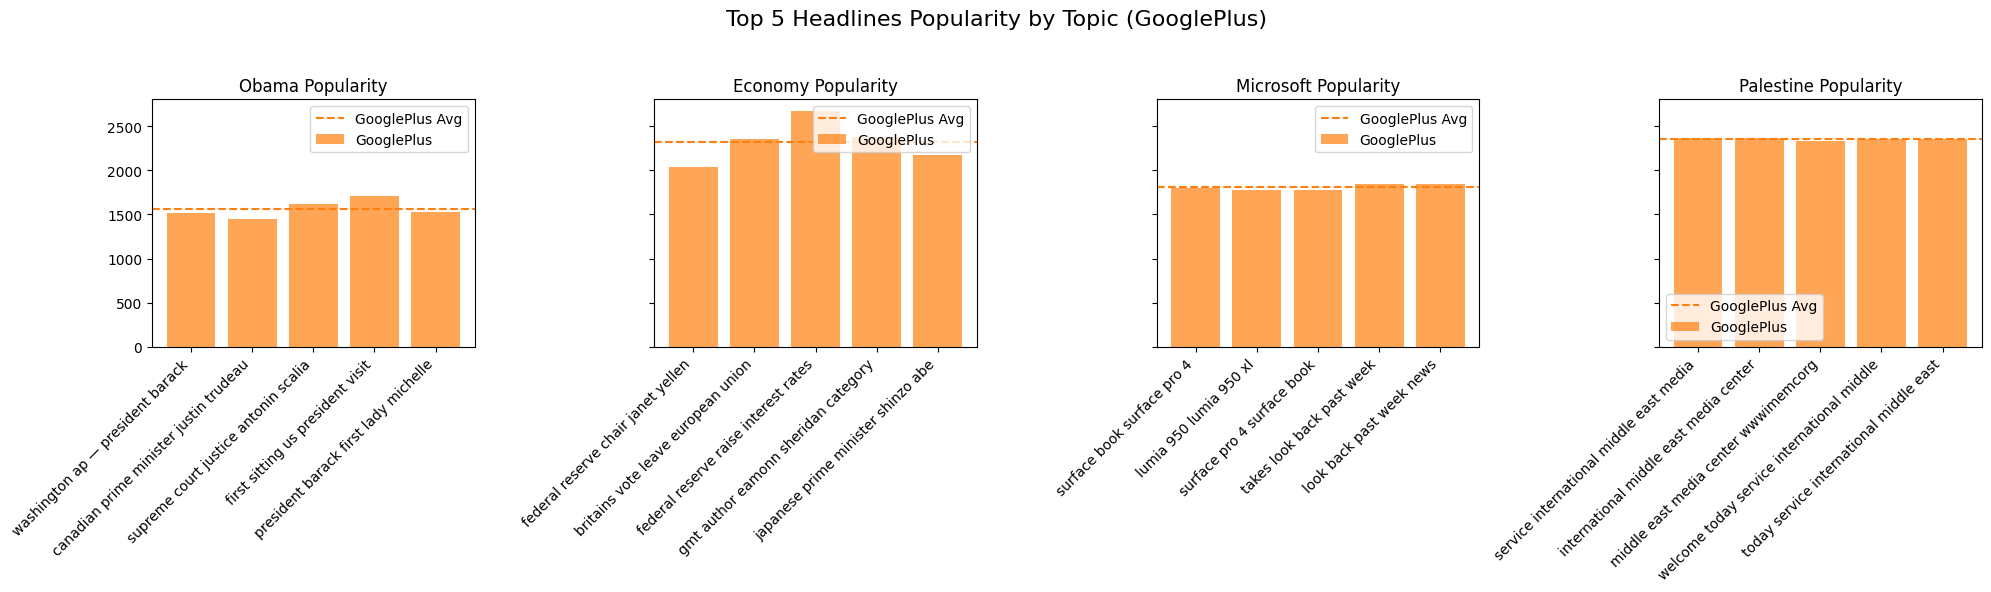

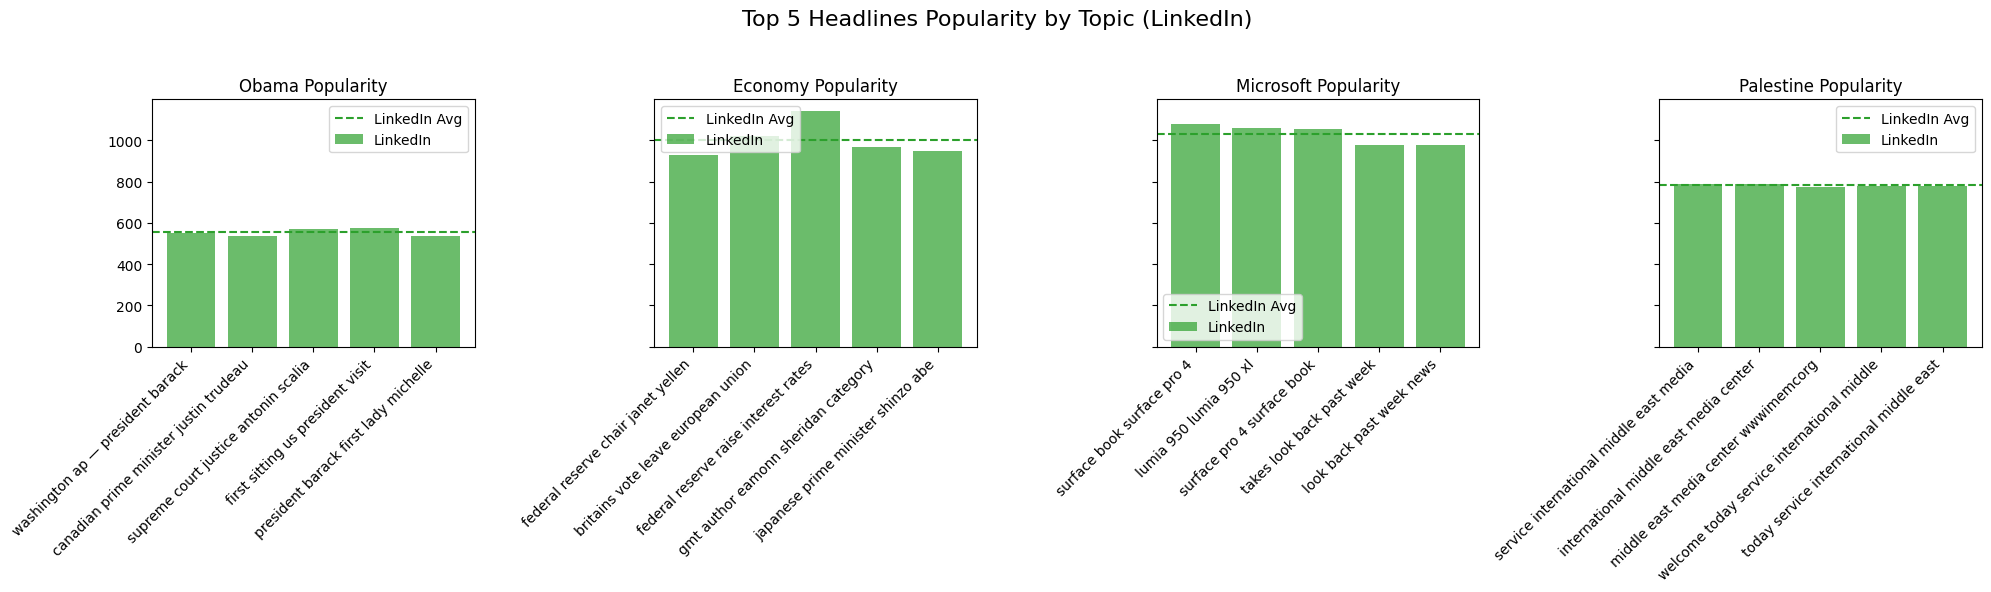

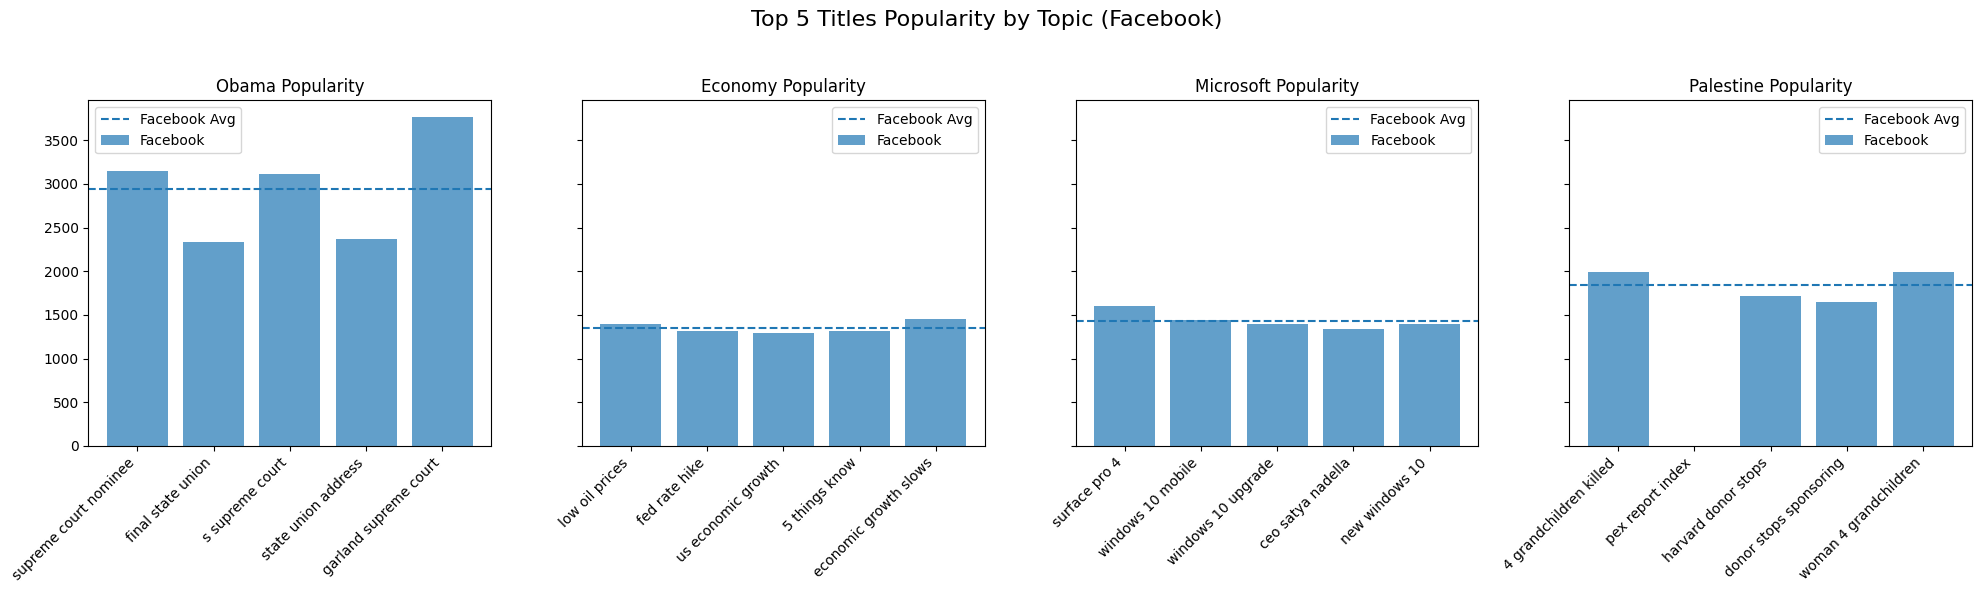

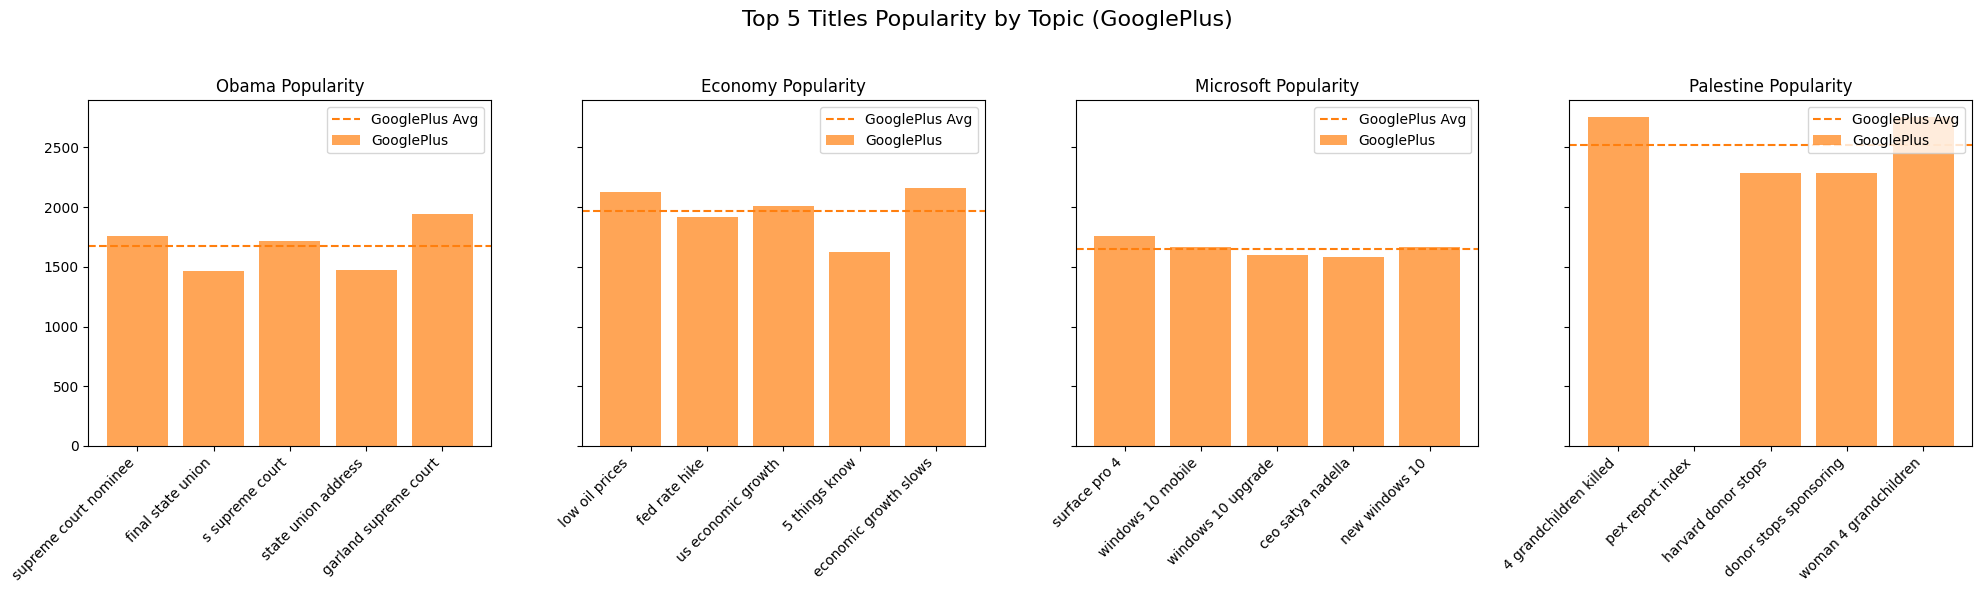

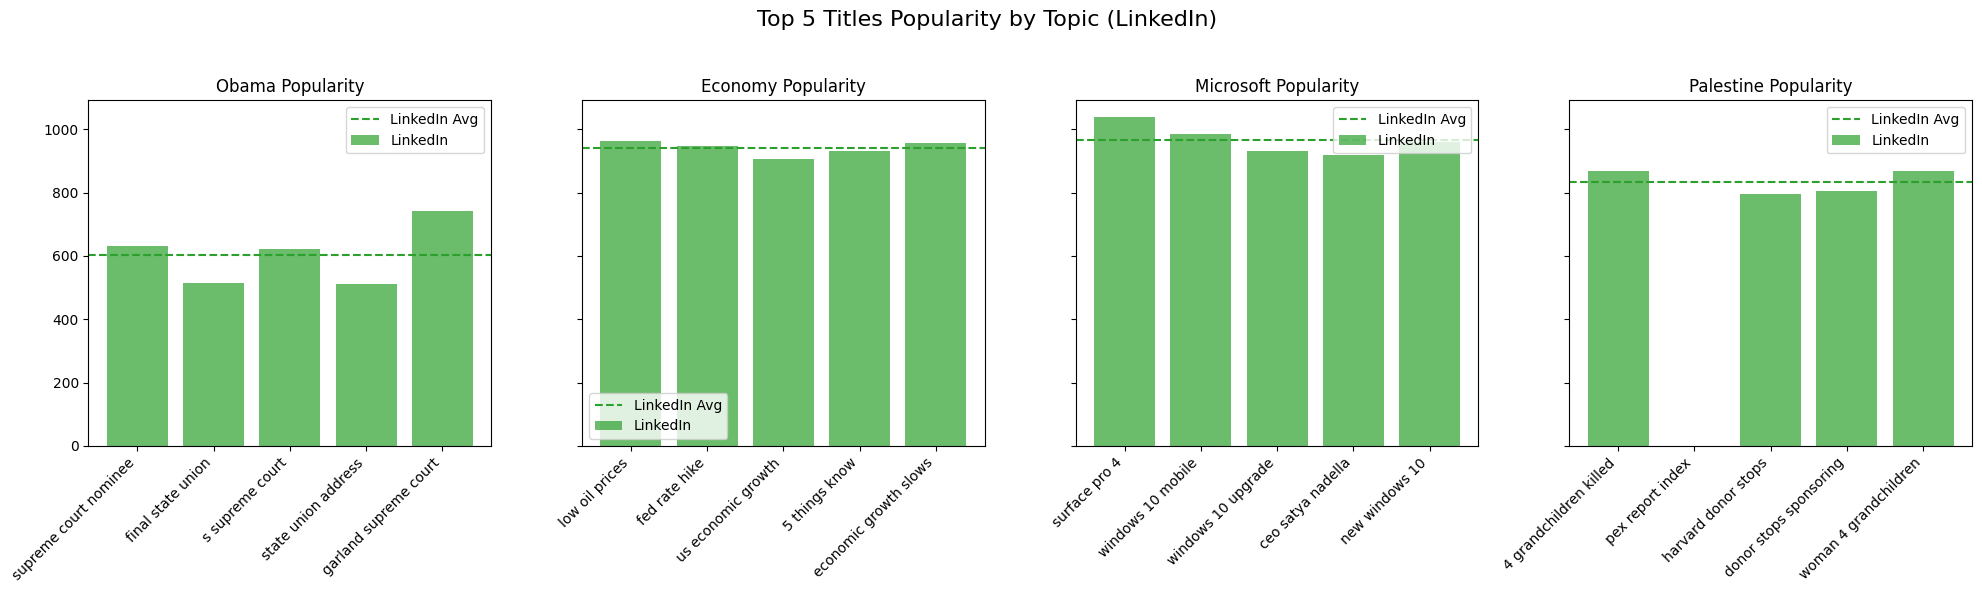

In [68]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Function to clean and remove stopwords from text
def preprocess_text(text, stop_words, exclude_word=None):
    text = text.lower()
    # Remove stopwords and exclude the topic from text
    text = re.sub(r'\b(' + '|'.join(stop_words) + r')\b', '', text)
    if exclude_word:
        text = text.replace(exclude_word, '')
    return re.sub(r'\s+', ' ', text).strip()

# Function to get the top N-grams from a list of texts
def get_top_ngrams(texts, n, top_k):
    ngrams = []
    for text in texts:
        words = text.split()
        ngrams.extend([' '.join(words[i:i+n]) for i in range(len(words) - n + 1)])
    return Counter(ngrams).most_common(top_k)

# Function to calculate average popularity of articles based on top words
def calculate_popularity(news, top_words, platforms):
    results = []
    for topic, words in top_words.items():
        for word_group, _ in words:
            filtered_df = news[(news['Topic'] == topic) & 
                             (news['Headline'].str.contains(word_group, case=False))]
            avg_popularity = filtered_df[platforms].mean().values
            results.append((topic, word_group, *avg_popularity))
    return pd.DataFrame(results, columns=['Topic', 'Words', *platforms])

# Function to plot the results for each platform separately
def plot_popularity_separate(df, platforms, title):
    unique_topics = df['Topic'].unique()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Default platform colors
    
    for platform in platforms:
        fig, axes = plt.subplots(1, len(unique_topics), figsize=(20, 6), sharey=True)
        fig.suptitle(f"{title} ({platform})", fontsize=16)

        for ax, topic in zip(axes, unique_topics):
            topic_df = df[df['Topic'] == topic]
            avg_pop = topic_df[platform].mean()

            ax.bar(topic_df['Words'], topic_df[platform], color=colors[platforms.index(platform)], alpha=0.7, label=platform)
            
            # Add average popularity lines
            ax.axhline(avg_pop, color=colors[platforms.index(platform)], linestyle='--', label=f'{platform} Avg')
            
            ax.set_title(f"{topic.capitalize()} Popularity")
            
            # Fix tick labeling issue
            ax.set_xticks(range(len(topic_df['Words'])))  # Set tick positions
            ax.set_xticklabels(topic_df['Words'], rotation=45, ha='right')
            
            ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Main function that does everything
def analyze_popularity(news, platforms=['Facebook', 'GooglePlus', 'LinkedIn'], stop_words=None):
    if stop_words is None:
        stop_words = set(stopwords.words('english'))
    
    # Preprocess texts without modifying the original dataframe
    news_copy = news.copy()
    news_copy['Headline'] = news_copy.apply(lambda row: preprocess_text(row['Headline'], stop_words, row['Topic']), axis=1)
    news_copy['Title'] = news_copy.apply(lambda row: preprocess_text(row['Title'], stop_words, row['Topic']), axis=1)

    # Extract top 5 repeating 5-grams in headlines and 3-grams in titles for each topic
    top_headlines = {topic: get_top_ngrams(news_copy[news_copy['Topic'] == topic]['Headline'], 5, 5) for topic in news_copy['Topic'].unique()}
    top_titles = {topic: get_top_ngrams(news_copy[news_copy['Topic'] == topic]['Title'], 3, 5) for topic in news_copy['Topic'].unique()}

    # Calculate popularity based on top headlines and titles
    headline_popularity = calculate_popularity(news_copy, top_headlines, platforms)
    title_popularity = calculate_popularity(news_copy, top_titles, platforms)

    # Plot the results for each platform separately
    plot_popularity_separate(headline_popularity, platforms, "Top 5 Headlines Popularity by Topic")
    plot_popularity_separate(title_popularity, platforms, "Top 5 Titles Popularity by Topic")

# Run the analysis (Example)
analyze_popularity(news)


*Insight- In general we can observe articles having the most common words among a topic have higher average popularity than others, this could be because of "Hot Topic" phenomena, when there is an important news regarding any of the one topic most of the sources write about it and the Title/Headline being highly repeated gains a higher popularity than other not so relevant titles/headlines for a topic.* 

#### 5. Day of the week effect on popularity for each Platform.


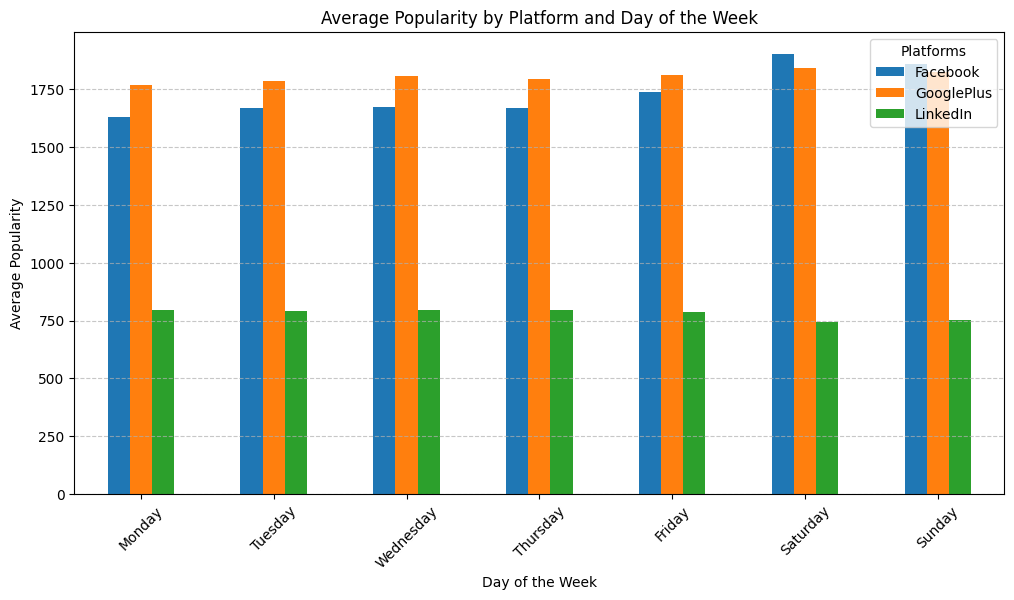

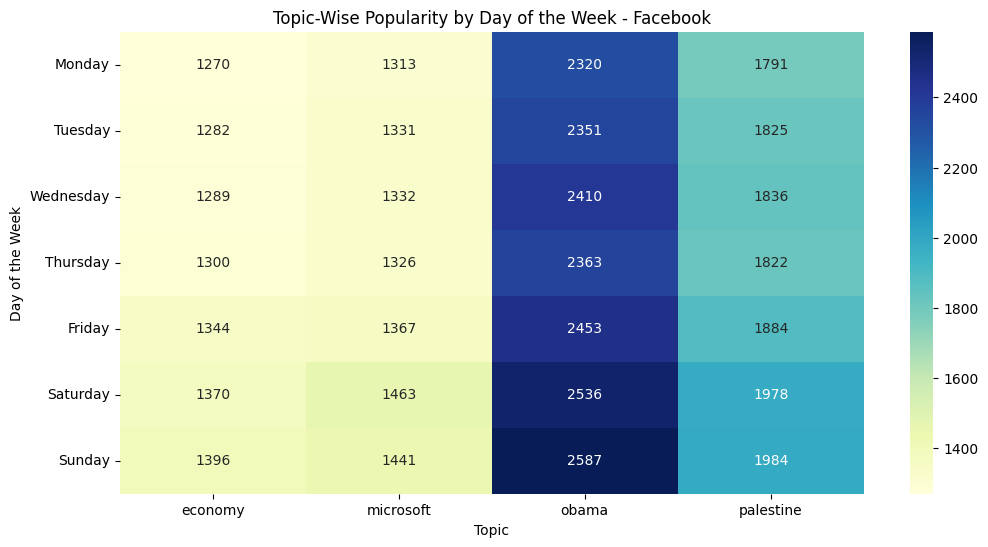

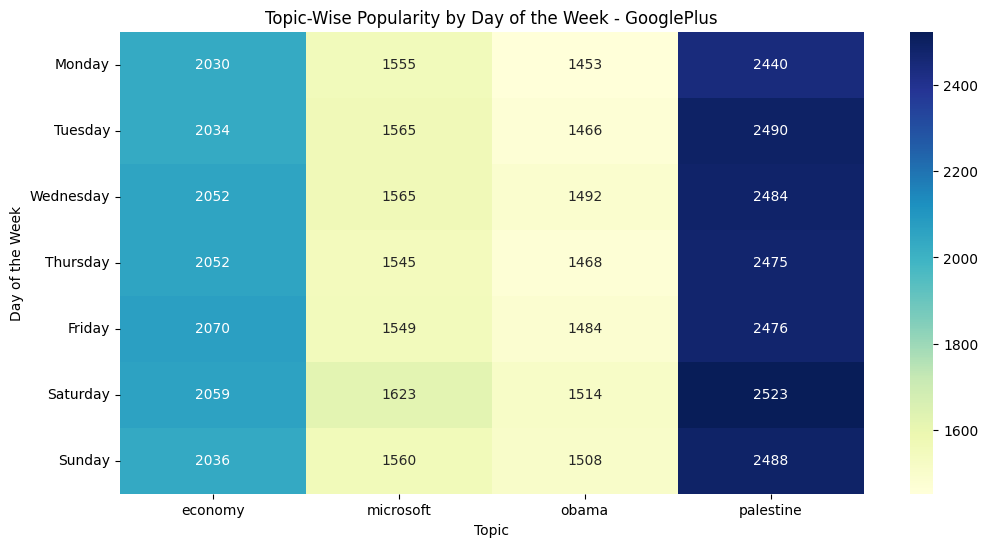

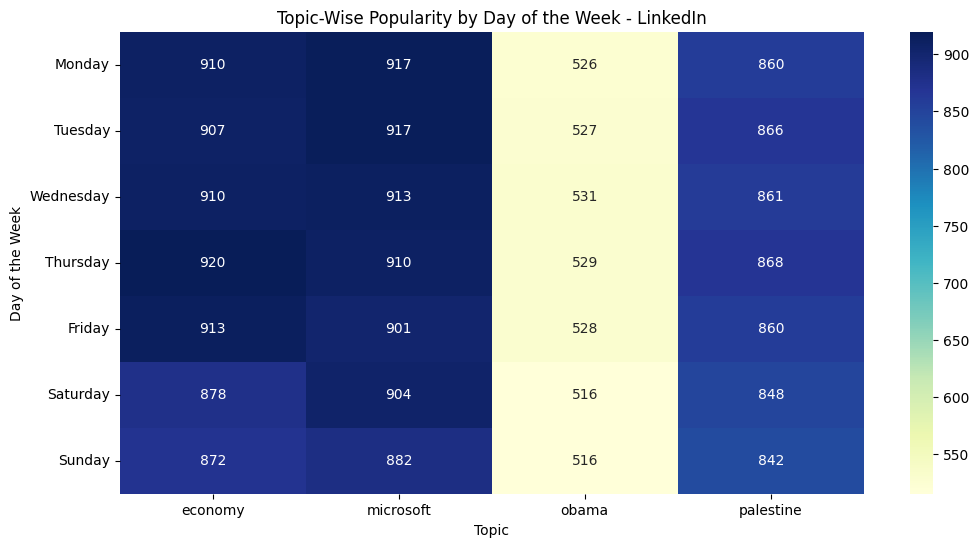

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_day_of_week_effect(news_df):
    """
    Analyzes how day of the week affects popularity on different platforms and topics.
    
    Parameters:
    - news_df: DataFrame containing PublishDate, Topic, and Popularity columns
    
    Visualizations:
    - Bar plot for average popularity by platform across days of the week
    - Heatmaps for average popularity by topic and platform across days of the week
    """
    
    # Extract day of the week
    df = news_df.copy()
    df['DayOfWeek'] = df['PublishDate'].dt.day_name()
    
    # Define platform popularity columns
    platform_columns = ['Facebook', 'GooglePlus', 'LinkedIn']

    # Average popularity by platform and day of the week
    platform_popularity = df.groupby('DayOfWeek')[platform_columns].mean().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

    # Average popularity by topic and day of the week
    topic_popularity = df.groupby(['DayOfWeek', 'Topic'])[platform_columns].mean().reset_index()
    topic_popularity_pivot = topic_popularity.pivot_table(
        index='DayOfWeek', 
        columns='Topic', 
        values=platform_columns, 
        aggfunc='mean'
    ).reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

    # Visualization: Bar plot for platforms
    def plot_platform_popularity(platform_popularity):
        platform_popularity.plot(kind='bar', figsize=(12, 6))
        plt.title("Average Popularity by Platform and Day of the Week")
        plt.ylabel("Average Popularity")
        plt.xlabel("Day of the Week")
        plt.xticks(rotation=45)
        plt.legend(title="Platforms")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # Visualization: Heatmaps for topics
    def plot_topic_popularity(topic_popularity_pivot):
        for platform in platform_columns:
            plt.figure(figsize=(12, 6))
            sns.heatmap(
                topic_popularity_pivot[platform], 
                cmap='YlGnBu', annot=True, fmt='.0f'
            )
            plt.title(f"Topic-Wise Popularity by Day of the Week - {platform}")
            plt.ylabel("Day of the Week")
            plt.xlabel("Topic")
            plt.show()

    # Generate visualizations
    plot_platform_popularity(platform_popularity)
    plot_topic_popularity(topic_popularity_pivot)
analyze_day_of_week_effect(news)


*Insight - To sum up the visualization we can say that articles published on weekends gain traction on facebook and googleplus while the opposite is true for linkedin which is more of a business/corporate application, mostly used during week days.*

#### 6. Movement of popularity with time of the day

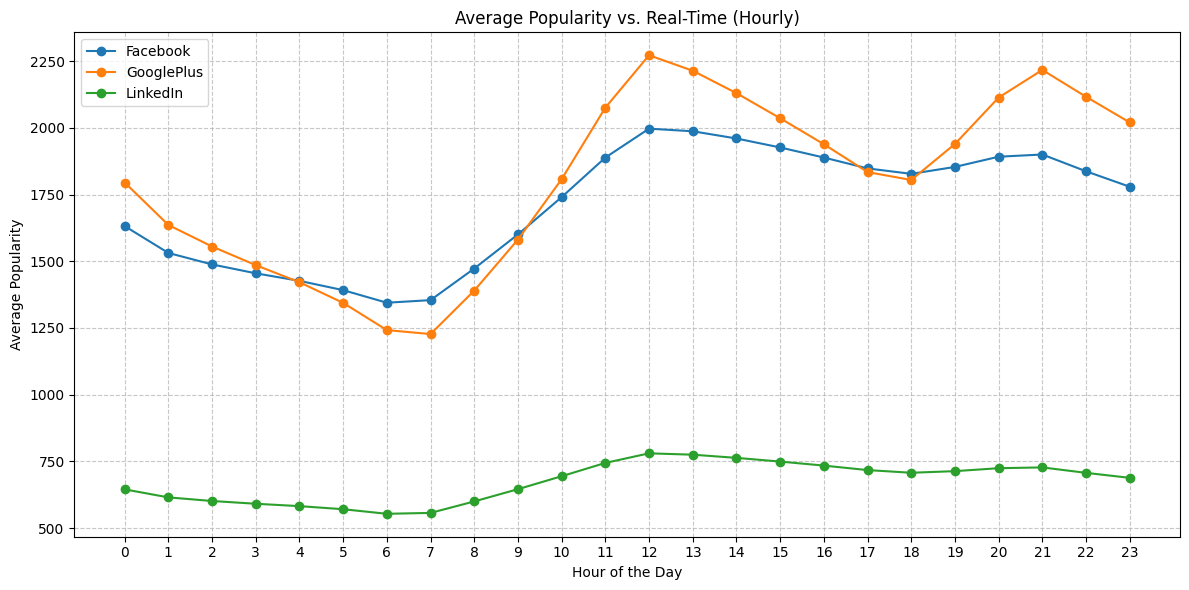

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def visualize_popularity_vs_time(review_dfs, news_df):
    platforms = ["Facebook", "GooglePlus", "LinkedIn"]
    hourly_popularity = {platform: {hour: [] for hour in range(24)} for platform in platforms}

    for platform in platforms:
        # Merge all topics for the platform
        platform_dfs = [df for (topic, p), df in review_dfs.items() if p == platform]
        combined_df = pd.concat(platform_dfs, axis=0).merge(
            news_df[['IDLink', 'PublishDate']], on='IDLink'
        )

        ts_columns = [col for col in combined_df.columns if col.startswith("TS")]
        real_time_data = []
        hour_data = []

        # Calculate real-time and hour in a single pass
        for ts in ts_columns:
            minutes_after_publish = int(ts[2:]) * 20
            real_time = combined_df['PublishDate'] + pd.to_timedelta(minutes_after_publish, unit='m')
            hour = real_time.dt.hour
            real_time_data.append(real_time)
            hour_data.append(hour)

        # Concatenate calculated columns
        real_time_df = pd.concat(real_time_data, axis=1, keys=[f"{ts}_RealTime" for ts in ts_columns])
        hour_df = pd.concat(hour_data, axis=1, keys=[f"{ts}_Hour" for ts in ts_columns])
        combined_df = pd.concat([combined_df, real_time_df, hour_df], axis=1)

        # Aggregate popularity by hour
        for ts in ts_columns:
            for hour in range(24):
                hourly_values = combined_df.loc[combined_df[f"{ts}_Hour"] == hour, ts].values
                if len(hourly_values) > 0:
                    hourly_popularity[platform][hour].extend(hourly_values)

    # Calculate average popularity per hour
    avg_hourly_popularity = {platform: [np.mean(hourly_popularity[platform][hour]) for hour in range(24)] for platform in platforms}

    # Plot the results
    plt.figure(figsize=(12, 6))
    for platform in platforms:
        plt.plot(range(24), avg_hourly_popularity[platform], label=platform, marker='o')

    plt.title("Average Popularity vs. Real-Time (Hourly)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Popularity")
    plt.xticks(range(24))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_popularity_vs_time(review_dfs, news)

Insight:

* We see a fall of average popularity during the night hours of the day from 22:00 to 5:00.
* The popularity rises during the mornings when poeple usually first open the apps.
* We see a plateau like movement of popularity during the afternoon to evening hours.
* Another interesting insight is the steep rise in average popularity of the articles during late evening, or early night hours in Facebook and GooglePlus, this could be becuase people usually use these apps just before bed.

### Popularity Prediction

I will provide you with all the analysis I have made regarding the dataset, after going through them carefully, I want you to come up with ML models and techniques we can use to predict the popularity.
1. Topic is one of the four values {'obama','microsoft','palestine','economy'} The occurences of these Topic are as followed {28610,21858,8843,33928} in the same order as the topic list.
2. Number of Articles Published by Day of the Week: 
DayOfWeek
Monday       16250
Tuesday      16720
Wednesday    15739
Thursday     15424
Friday       13846
Saturday      6994
Sunday        82662. 
3. Number of Articles Published by Time of Day:
TimeOfDay
Morning (6 AM - 12 PM)      20257
Afternoon (12 PM - 5 PM)    23551
Evening (5 PM - 9 PM)       17374
Night (9 PM - 6 AM)         32057
4. Top Topics by Platform:
Facebook: obama (Average Popularity = 2411.93)
GooglePlus: palestine (Average Popularity = 2480.58)
LinkedIn: microsoft (Average Popularity = 909.74)
Insights: 

* *Obama and Palestine perform better on facebook as compared to microsoft and economy, suggesting sentimental topics have a higher popularity on Facebook as compared to other topics.*

* *Global Topics like palestine and economy perform good on GooglePlus.*

* *Microsoft and Economy perform the best in LinkedIn as they directly relate to job opportunities and purpose of the platform.*

5. *Insight: Almost all articles with a repeating sources for a topic attains a lot of traction as compared to the other average occuring sources on all platforms irrespective of the topic. Therefore we can conclude Source is a highly important parameter for an articles popularity irrespective of the platfrom or topic. A repetative source for a topic will attain on an average higher popularity as compared to sources that are not frequent.*

6. There are two more columns in the news_df Sentiment_Headline and Sentiment_Title
I combined the two columns using average and created a temporary mean_sentiment column and then analysed popularity vs upper, lower quartile of mean_sentiment and got the below results:                                      
                                          Facebook	GooglePlus	LinkedIn 
sentiment_category			
Extreme +vs Sentiment	1890.259258	1824.372085	808.876082
Extreme -ve Sentiment	1745.458791	1869.388414	810.139478
Medium Sentiment	1600.414076	1752.636002	762.046227
*Insight - Articles with extreme positive or negative Headline/Title perform better on all platforms as compared to modest sentiment Headline/Title article. The articles follow "Bad publicity is Good publicity". Articles with extreme negative values perform even better than positive articles on googleplus and linkedin.*

7. *Insight- In general we observe that articles having the most common words in headline/title for a topic have higher average popularity than others, this could be because of "Hot Topic" phenomena, when there is an important news regarding any of the one topic most of the sources write about it and the Title/Headline being highly repeated gains a higher popularity than other not so relevant titles/headlines for a topic.* 

8. *Insight - we can say that articles published on weekends gain traction on facebook and googleplus while the opposite is true for linkedin which is more of a business/corporate application, mostly used during week days.*


Source column feature engineering

In [71]:
df=news.copy()

In [72]:
# Group by Topic and Source, and count occurrences
top_sources_per_topic = (
    df.groupby(['Topic', 'Source'])
    .size()
    .reset_index(name='count')
    .sort_values(['Topic', 'count'], ascending=[True, False])
)

# Identify top 20 sources per topic
top_sources_per_topic = top_sources_per_topic.groupby('Topic').head(20)

# Create a set of top sources for efficient lookup
top_sources_set = set(top_sources_per_topic['Source'])

# Replace sources not in the top set with "Others"
df['Source'] = df['Source'].apply(lambda x: x if x in top_sources_set else 'Others')

# Check the updated distribution of sources
df['Source'].value_counts()


Source
Others             62492
Bloomberg           1732
Reuters             1321
ABC News            1098
New York Times       992
                   ...  
Arutz Sheva          105
Mondoweiss            94
KLTV 7 Tyler          88
                      82
The Muslim News       67
Name: count, Length: 74, dtype: int64

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine Title and Headline into one column for processing
df['Combined_Text'] = df['Title'] + " " + df['Headline']

# Create Bag-of-Words Model
vectorizer = CountVectorizer(max_features=1000)  # Top 1000 features
bow_matrix = vectorizer.fit_transform(df['Combined_Text'])

# Sum the occurrences of words to represent repetition
word_repetition = bow_matrix.sum(axis=1)

# Add as a new feature
df['Word_Repetition'] = word_repetition.A.flatten()  # Convert sparse matrix to flat array

# Drop the combined text column to avoid redundancy
df.drop(columns=['Combined_Text'], inplace=True)


In [74]:
# One-hot encode Source and Topic
df_encoded = pd.get_dummies(df, columns=['Source', 'Topic'], drop_first=True)

# Select features and target variables
X = df_encoded.drop(columns=['Facebook', 'GooglePlus', 'LinkedIn', 'Title', 'Headline', 'PublishDate', 'sentiment_category'])
y = df[['Facebook', 'GooglePlus', 'LinkedIn']]

# Verify the shape of the feature matrix and target variables
print("Feature matrix shape:", X.shape)
print("Target variables shape:", y.shape)


Feature matrix shape: (93239, 81)
Target variables shape: (93239, 3)


In [75]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the sizes of the splits
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (74591, 81) (74591, 3)
Testing set size: (18648, 81) (18648, 3)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate using RMSE
linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

print("Linear Regression RMSE:", linear_rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 276.04178338200927
Random Forest RMSE: 246.57776663527798


In [77]:
from sklearn xgboost
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

print("XGBoost RMSE:", xgb_rmse)


SyntaxError: invalid syntax (2184146748.py, line 1)